<a href="https://colab.research.google.com/github/tjbingamon/Prediction-of-Product-Sales/blob/main/Prediction-of-Product-Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction of Product Sales
 Thomas Bingamon


## Project Overview

## Load and Inspect Data

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Import Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
filename = ('/content/drive/MyDrive/Homework Stuff/sales_predictions.xlsx')

- Display head of data frame

In [18]:
product_df = pd.read_excel(filename)
product_df
product_df.info()
product_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

1. How many rows and columns?

In [19]:
product_df.shape

(8523, 12)

2. What are the datatypes of each variable?




In [20]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3. Are there duplicates? If so, drop any duplicates.

In [21]:
product_df.duplicated().sum()

0

4. Identify missing values.

In [22]:
product_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

- Add a justification for method chosen in a text cell for each column addressed.

In [23]:
# "Outlet_Establishment_Year", "Outlet_Location_Type", and "Outlet_Type" are not relevant to the data we need.
product_df2 = product_df
# the Item_Weight and Outlet_Size both contain missing values that are irrelevant to the exploratory analysis of the assignemnt.
product_df2.drop(columns=['Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,994.7052
...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,NaN,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,1845.5976


###Justifications for methods

- **'Outlet_Establishment_Year'**: +50% missing values per row would be significant enough to justify this option.

- **'Outlet_Location_Type'**: +50% missing values per row would be significant enough to justify this option.

- **'Outlet_Type'**: +50% missing values per row would be significant enough to justify this option.

6. Confirm that there are no missing values after addressing them.

In [24]:
product_df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

7.  Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).


In [25]:
product_df2.replace({'LF': 'Low Fat', 'reg': 'Regular'}, inplace = True)

In [26]:
print(product_df2)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [27]:
product_df2.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

Histogram to view the distributions of various features in your dataset.

Text(0, 0.5, 'Item_MRP')

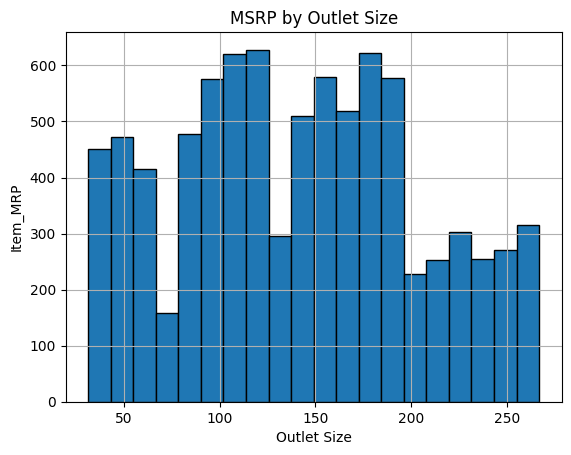

In [28]:
ax = product_df2['Item_MRP'].hist(bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.ticklabel_format(style='plain')
ax.set_title('MSRP by Outlet Size')
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Item_MRP')

Boxplot to view statistical summaries of various features in your dataset.

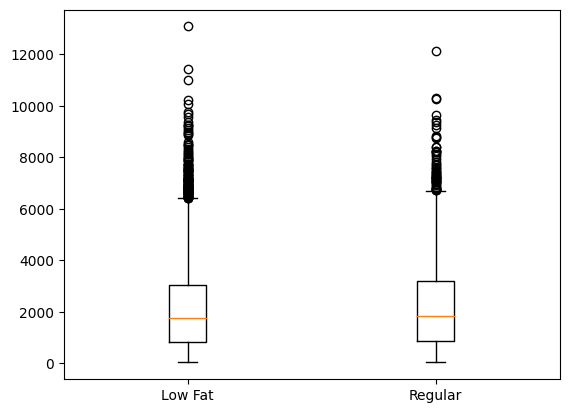

In [29]:
lf =  product_df2.loc[product_df2['Item_Fat_Content']=='Low Fat','Item_Outlet_Sales']
rg =  product_df2.loc[product_df2['Item_Fat_Content']=='Regular','Item_Outlet_Sales']
fig, ax = plt.subplots()
ax.boxplot([lf,rg], labels=['Low Fat', 'Regular']);


Heatmap of the correlation between features

<Axes: >

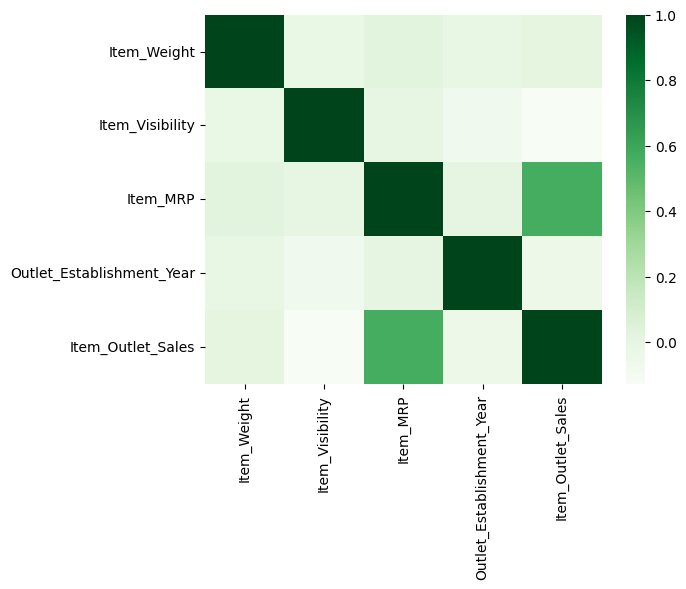

In [30]:
corr= product_df2.corr()

sns.heatmap(corr, cmap = 'Greens')

## Explanatory Data Analysis